In [1]:

import pandas as pd
import os

# Path to the directory containing the datasets
directory = 'D:\\ML_Coursework_Dataset'  # Use double backslashes or raw strings for Windows paths

# Initialize an empty list to store DataFrames
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):  # Assuming all datasets are CSV files
        # Read the dataset into a DataFrame
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        
      
        
        # Append the filtered DataFrame to the list
        dfs.append(df)




C:\Users\tejak\AppData\Local\Temp\ipykernel_11272\3350118631.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [2]:
dfs[0].head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.0,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.0,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.0,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.0,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.0,E,Estimated value,NaN


In [3]:
dfs[0] = dfs[0].pivot_table(index=['Area', 'Year', 'Item', 'Domain'], columns='Element', values='Value').reset_index()
dfs[0]

Element,Area,Year,Item,Domain,Export Value,Import Value
0,Afghanistan,1991,Alcoholic Beverages,Crops and livestock products,NaN,0.00
1,Afghanistan,1991,Cereals and Preparations,Crops and livestock products,NaN,41600.00
2,Afghanistan,1991,Dairy Products and Eggs,Crops and livestock products,NaN,4590.00
3,Afghanistan,1991,Fats and Oils (excluding Butter),Crops and livestock products,NaN,28300.00
4,Afghanistan,1991,Fruit and Vegetables,Crops and livestock products,51858.00,360.00
...,...,...,...,...,...,...
73989,Zimbabwe,2022,Non-edible Fats and Oils,Crops and livestock products,270.43,14181.34
73990,Zimbabwe,2022,Non-food,Crops and livestock products,1075098.72,137610.78
73991,Zimbabwe,2022,Other food,Crops and livestock products,31469.38,111122.41
73992,Zimbabwe,2022,Sugar and Honey,Crops and livestock products,27722.63,27105.89


In [4]:
dfs[0].isnull().sum()

Element
Area               0
Year               0
Item               0
Domain             0
Export Value    6170
Import Value      80
dtype: int64

In [5]:
dfs[0][dfs[0]['Export Value'].isna()]

Element,Area,Year,Item,Domain,Export Value,Import Value
0,Afghanistan,1991,Alcoholic Beverages,Crops and livestock products,NaN,0.00
1,Afghanistan,1991,Cereals and Preparations,Crops and livestock products,NaN,41600.00
2,Afghanistan,1991,Dairy Products and Eggs,Crops and livestock products,NaN,4590.00
3,Afghanistan,1991,Fats and Oils (excluding Butter),Crops and livestock products,NaN,28300.00
5,Afghanistan,1991,Meat and Meat Preparations,Crops and livestock products,NaN,203.00
...,...,...,...,...,...,...
73190,Yemen,2021,Alcoholic Beverages,Crops and livestock products,NaN,0.03
73232,Zambia,1991,Non-alcoholic Beverages,Crops and livestock products,NaN,600.00
73244,Zambia,1992,Non-alcoholic Beverages,Crops and livestock products,NaN,261.00
73941,Zimbabwe,2018,Non-edible Fats and Oils,Crops and livestock products,NaN,6917.67


In [6]:
dfs[0] = dfs[0].dropna(subset=['Export Value'])
dfs[0] = dfs[0].rename_axis(None, axis=1)
dfs[0]

,Area,Year,Item,Domain,Export Value,Import Value
4,Afghanistan,1991,Fruit and Vegetables,Crops and livestock products,51858.00,360.00
8,Afghanistan,1991,Non-food,Crops and livestock products,45055.00,12000.00
9,Afghanistan,1991,Other food,Crops and livestock products,1330.00,26360.00
10,Afghanistan,1991,Sugar and Honey,Crops and livestock products,0.00,4900.00
11,Afghanistan,1991,Tobacco,Crops and livestock products,0.00,12000.00
...,...,...,...,...,...,...
73989,Zimbabwe,2022,Non-edible Fats and Oils,Crops and livestock products,270.43,14181.34
73990,Zimbabwe,2022,Non-food,Crops and livestock products,1075098.72,137610.78
73991,Zimbabwe,2022,Other food,Crops and livestock products,31469.38,111122.41
73992,Zimbabwe,2022,Sugar and Honey,Crops and livestock products,27722.63,27105.89


In [7]:
dfs[1].head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,2000.0,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,2448.0,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2012,2012,1000 t,2001.0,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2013,2013,1000 t,2155.0,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2014,2014,1000 t,1840.0,E,Estimated value


In [8]:
dfs[2].head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,88.0,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,89.0,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,92.0,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,93.0,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,94.0,E,Estimated value,NaN


In [9]:
dfs[3]

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,NaN,24.356332,I,Imputed value,base year is 2015
1,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7002,February,6125,Value,NaN,23.636242,I,Imputed value,base year is 2015
2,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7003,March,6125,Value,NaN,23.485345,I,Imputed value,base year is 2015
3,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7004,April,6125,Value,NaN,24.767194,I,Imputed value,base year is 2015
4,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7005,May,6125,Value,NaN,25.956912,I,Imputed value,base year is 2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112885,CP,Consumer Price Indices,716,Zimbabwe,2023,2023,23014,Food price inflation,7005,May,6121,Value,%,116.960656,E,Estimated value,NaN
112886,CP,Consumer Price Indices,716,Zimbabwe,2023,2023,23014,Food price inflation,7006,June,6121,Value,%,255.596454,E,Estimated value,NaN
112887,CP,Consumer Price Indices,716,Zimbabwe,2023,2023,23014,Food price inflation,7007,July,6121,Value,%,103.098144,E,Estimated value,NaN
112888,CP,Consumer Price Indices,716,Zimbabwe,2023,2023,23014,Food price inflation,7008,August,6121,Value,%,70.758637,E,Estimated value,NaN


In [11]:
dfs[3].columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Year Code', 'Year',
       'Item Code', 'Item', 'Months Code', 'Months', 'Element Code', 'Element',
       'Unit', 'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [12]:
dfs[3] = dfs[3].groupby(['Year', 'Area']).agg({
    'Domain Code': 'first',
    'Domain': lambda x: ', '.join(x.unique()),
    'Area Code (M49)': 'first',
    'Year Code': 'first',
    'Item Code': 'first',
    'Item': 'first',
    'Months Code': 'first',
    'Months': 'first',
    'Element Code': 'first',
    'Element': 'first',
    'Unit': 'first',
    'Value': 'mean',
    'Flag': 'first',
    'Flag Description': 'first',
    'Note': 'first'
}).reset_index()

In [14]:
dfs[3]

,Year,Area,Domain Code,Domain,Area Code (M49),Year Code,Item Code,Item,Months Code,Months,Element Code,Element,Unit,Value,Flag,Flag Description,Note
0,2000,Afghanistan,CP,Consumer Price Indices,4,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,None,26.629848,I,Imputed value,base year is 2015
1,2000,Albania,CP,Consumer Price Indices,8,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,None,57.765107,I,Imputed value,base year is 2015
2,2000,Algeria,CP,Consumer Price Indices,12,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,None,50.779359,I,Imputed value,base year is 2015
3,2000,Andorra,CP,Consumer Price Indices,20,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,None,71.219256,I,Imputed value,base year is 2015
4,2000,Angola,CP,Consumer Price Indices,24,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,None,1.691044,I,Imputed value,base year is 2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4851,2023,Viet Nam,CP,Consumer Price Indices,704,2023,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,%,65.412897,X,Figure from international organizations,base year is 2015
4852,2023,Yemen,CP,Consumer Price Indices,887,2023,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,%,85.136045,F,Forecast value,base year is 2015
4853,2023,Zambia,CP,Consumer Price Indices,894,2023,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,%,136.585715,F,Forecast value,base year is 2015
4854,2023,Zimbabwe,CP,Consumer Price Indices,716,2023,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,%,18270.476556,X,Figure from international organizations,base year is 2015


In [16]:
dfs[3] = dfs[3].pivot_table(index=['Area', 'Year'], columns='Item', values='Value').reset_index()

In [17]:
dfs[3] = dfs[3].rename_axis(None, axis=1)
dfs[3]

,Area,Year,"Consumer Prices, Food Indices (2015 = 100)"
0,Afghanistan,2000,26.629848
1,Afghanistan,2001,21.337120
2,Afghanistan,2002,26.799704
3,Afghanistan,2003,27.152679
4,Afghanistan,2004,29.956366
...,...,...,...
4851,Åland Islands,2019,52.363086
4852,Åland Islands,2020,52.114126
4853,Åland Islands,2021,52.974403
4854,Åland Islands,2022,62.311460


In [18]:
merge_df = pd.merge(dfs[0], dfs[3], on=['Area', 'Year'])
merge_df

,Area,Year,Item,Domain,Export Value,Import Value,"Consumer Prices, Food Indices (2015 = 100)"
0,Afghanistan,2000,Fruit and Vegetables,Crops and livestock products,31080.00,3625.00,26.629848
1,Afghanistan,2000,Non-food,Crops and livestock products,10300.00,13000.00,26.629848
2,Afghanistan,2000,Other food,Crops and livestock products,1715.00,88200.00,26.629848
3,Afghanistan,2000,Sugar and Honey,Crops and livestock products,0.00,14200.00,26.629848
4,Afghanistan,2000,Tobacco,Crops and livestock products,0.00,13000.00,26.629848
...,...,...,...,...,...,...,...
47333,Zimbabwe,2022,Non-edible Fats and Oils,Crops and livestock products,270.43,14181.34,9446.435136
47334,Zimbabwe,2022,Non-food,Crops and livestock products,1075098.72,137610.78,9446.435136
47335,Zimbabwe,2022,Other food,Crops and livestock products,31469.38,111122.41,9446.435136
47336,Zimbabwe,2022,Sugar and Honey,Crops and livestock products,27722.63,27105.89,9446.435136


In [19]:
dfs[4].head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2000,2000,100 g/ha,8063,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2001,2001,100 g/ha,10067,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2002,2002,100 g/ha,16698,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2003,2003,100 g/ha,14580,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2004,2004,100 g/ha,13348,A,Official figure,NaN


In [20]:
dfs[5].head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2000,2000,million USD,0.17,X,Figure from international organizations,UNCTAD
1,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2001,2001,million USD,0.68,X,Figure from international organizations,UNCTAD
2,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2002,2002,million USD,50.00,X,Figure from international organizations,UNCTAD
3,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2003,2003,million USD,57.80,X,Figure from international organizations,UNCTAD
4,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2004,2004,million USD,186.90,X,Figure from international organizations,UNCTAD


In [21]:
dfs[5] = dfs[5].pivot_table(index=['Area', 'Year'], columns='Item', values='Value').reset_index()
dfs[5] = dfs[5].rename_axis(None, axis=1)
dfs[5]

,Area,Year,"FDI inflows to Agriculture, Forestry and Fishing","FDI inflows to Food, Beverages and Tobacco","FDI outflows to Agriculture, Forestry and Fishing","FDI outflows to Food, Beverages and Tobacco",Total FDI inflows,Total FDI outflows
0,Afghanistan,2000,NaN,NaN,NaN,NaN,0.170000,NaN
1,Afghanistan,2001,NaN,NaN,NaN,NaN,0.680000,NaN
2,Afghanistan,2002,NaN,NaN,NaN,NaN,50.000000,NaN
3,Afghanistan,2003,NaN,NaN,NaN,NaN,57.800000,1.000000
4,Afghanistan,2004,NaN,NaN,NaN,NaN,186.900000,-0.700000
...,...,...,...,...,...,...,...,...
4575,Zimbabwe,2018,NaN,NaN,NaN,NaN,745.007943,26.771877
4576,Zimbabwe,2019,NaN,NaN,NaN,NaN,280.000000,32.000000
4577,Zimbabwe,2020,NaN,NaN,NaN,NaN,194.000000,33.000000
4578,Zimbabwe,2021,NaN,NaN,NaN,NaN,250.000000,32.000000


In [22]:
dfs[5] = dfs[5].dropna(axis=1, how='all')

In [23]:
dfs[5]

,Area,Year,"FDI inflows to Agriculture, Forestry and Fishing","FDI inflows to Food, Beverages and Tobacco","FDI outflows to Agriculture, Forestry and Fishing","FDI outflows to Food, Beverages and Tobacco",Total FDI inflows,Total FDI outflows
0,Afghanistan,2000,NaN,NaN,NaN,NaN,0.170000,NaN
1,Afghanistan,2001,NaN,NaN,NaN,NaN,0.680000,NaN
2,Afghanistan,2002,NaN,NaN,NaN,NaN,50.000000,NaN
3,Afghanistan,2003,NaN,NaN,NaN,NaN,57.800000,1.000000
4,Afghanistan,2004,NaN,NaN,NaN,NaN,186.900000,-0.700000
...,...,...,...,...,...,...,...,...
4575,Zimbabwe,2018,NaN,NaN,NaN,NaN,745.007943,26.771877
4576,Zimbabwe,2019,NaN,NaN,NaN,NaN,280.000000,32.000000
4577,Zimbabwe,2020,NaN,NaN,NaN,NaN,194.000000,33.000000
4578,Zimbabwe,2021,NaN,NaN,NaN,NaN,250.000000,32.000000


In [24]:
dfs[5].isnull().sum()

Area                                                    0
Year                                                    0
FDI inflows to Agriculture, Forestry and Fishing     2964
FDI inflows to Food, Beverages and Tobacco           3475
FDI outflows to Agriculture, Forestry and Fishing    3867
FDI outflows to Food, Beverages and Tobacco          3883
Total FDI inflows                                      14
Total FDI outflows                                   1001
dtype: int64

In [25]:
# Set the threshold for the minimum number of non-null values required
threshold = 0.5
min_non_null_count = int((1 - threshold) * len(dfs[5]))

# Drop columns with more than 64% null values
dfs[5] = dfs[5].dropna(axis=1, thresh=min_non_null_count)
dfs[5]

,Area,Year,Total FDI inflows,Total FDI outflows
0,Afghanistan,2000,0.170000,NaN
1,Afghanistan,2001,0.680000,NaN
2,Afghanistan,2002,50.000000,NaN
3,Afghanistan,2003,57.800000,1.000000
4,Afghanistan,2004,186.900000,-0.700000
...,...,...,...,...
4575,Zimbabwe,2018,745.007943,26.771877
4576,Zimbabwe,2019,280.000000,32.000000
4577,Zimbabwe,2020,194.000000,33.000000
4578,Zimbabwe,2021,250.000000,32.000000


In [26]:
dfs[5][dfs[5]['Area'] == 'Afghanistan']

,Area,Year,Total FDI inflows,Total FDI outflows
0,Afghanistan,2000,0.170000,NaN
1,Afghanistan,2001,0.680000,NaN
2,Afghanistan,2002,50.000000,NaN
3,Afghanistan,2003,57.800000,1.000000
4,Afghanistan,2004,186.900000,-0.700000
5,Afghanistan,2005,271.000000,1.500000
6,Afghanistan,2006,238.000000,NaN
7,Afghanistan,2007,188.690000,NaN
8,Afghanistan,2008,46.033740,-1.918036
9,Afghanistan,2009,197.512728,0.334959


In [27]:
dfs[5].isnull().sum()

Area                     0
Year                     0
Total FDI inflows       14
Total FDI outflows    1001
dtype: int64

In [28]:
for area in dfs[5]['Area'].unique():
    # Calculate the mean for 'Total FDI inflows' for the specified area
    mean_inflows = dfs[5][dfs[5]['Area'] == area]['Total FDI inflows'].mean()
    
    # Fill NaN values for 'Total FDI inflows' for the specified area
    dfs[5].loc[dfs[5]['Area'] == area, 'Total FDI inflows'] = dfs[5].loc[dfs[5]['Area'] == area, 'Total FDI inflows'].fillna(mean_inflows)
    
    # Calculate the mean for 'Total FDI outflows' for the specified area
    mean_outflows = dfs[5][dfs[5]['Area'] == area]['Total FDI outflows'].mean()
    
    # Fill NaN values for 'Total FDI outflows' for the specified area
    dfs[5].loc[dfs[5]['Area'] == area, 'Total FDI outflows'] = dfs[5].loc[dfs[5]['Area'] == area, 'Total FDI outflows'].fillna(mean_outflows)

# Display the updated DataFrame
(dfs[5])


,Area,Year,Total FDI inflows,Total FDI outflows
0,Afghanistan,2000,0.170000,8.984238
1,Afghanistan,2001,0.680000,8.984238
2,Afghanistan,2002,50.000000,8.984238
3,Afghanistan,2003,57.800000,1.000000
4,Afghanistan,2004,186.900000,-0.700000
...,...,...,...,...
4575,Zimbabwe,2018,745.007943,26.771877
4576,Zimbabwe,2019,280.000000,32.000000
4577,Zimbabwe,2020,194.000000,33.000000
4578,Zimbabwe,2021,250.000000,32.000000


In [29]:
dfs[5].isnull().sum()

Area                    0
Year                    0
Total FDI inflows       2
Total FDI outflows    525
dtype: int64

In [30]:
dfs[5][dfs[5]['Total FDI outflows'].isna()]

,Area,Year,Total FDI inflows,Total FDI outflows
480,Bhutan,2002,2.425412,NaN
481,Bhutan,2003,3.370307,NaN
482,Bhutan,2004,8.859908,NaN
483,Bhutan,2005,6.210884,NaN
484,Bhutan,2006,70.968239,NaN
...,...,...,...,...
4233,Tuvalu,2017,0.300000,NaN
4234,Tuvalu,2018,0.298862,NaN
4235,Tuvalu,2019,0.298862,NaN
4236,Tuvalu,2020,0.100000,NaN


In [31]:
dfs[5][dfs[5]['Area'] == 'Bhutan']

,Area,Year,Total FDI inflows,Total FDI outflows
480,Bhutan,2002,2.425412,NaN
481,Bhutan,2003,3.370307,NaN
482,Bhutan,2004,8.859908,NaN
483,Bhutan,2005,6.210884,NaN
484,Bhutan,2006,70.968239,NaN
485,Bhutan,2007,-74.738890,NaN
486,Bhutan,2008,-1.422129,NaN
487,Bhutan,2009,24.890704,NaN
488,Bhutan,2010,26.036701,NaN
489,Bhutan,2011,7.896337,NaN


In [32]:
merge_df = pd.merge(merge_df, dfs[5], on=['Area', 'Year'])
merge_df

,Area,Year,Item,Domain,Export Value,Import Value,"Consumer Prices, Food Indices (2015 = 100)",Total FDI inflows,Total FDI outflows
0,Afghanistan,2000,Fruit and Vegetables,Crops and livestock products,31080.00,3625.00,26.629848,0.17,8.984238
1,Afghanistan,2000,Non-food,Crops and livestock products,10300.00,13000.00,26.629848,0.17,8.984238
2,Afghanistan,2000,Other food,Crops and livestock products,1715.00,88200.00,26.629848,0.17,8.984238
3,Afghanistan,2000,Sugar and Honey,Crops and livestock products,0.00,14200.00,26.629848,0.17,8.984238
4,Afghanistan,2000,Tobacco,Crops and livestock products,0.00,13000.00,26.629848,0.17,8.984238
...,...,...,...,...,...,...,...,...,...
46965,Zimbabwe,2022,Non-edible Fats and Oils,Crops and livestock products,270.43,14181.34,9446.435136,341.50,17.000000
46966,Zimbabwe,2022,Non-food,Crops and livestock products,1075098.72,137610.78,9446.435136,341.50,17.000000
46967,Zimbabwe,2022,Other food,Crops and livestock products,31469.38,111122.41,9446.435136,341.50,17.000000
46968,Zimbabwe,2022,Sugar and Honey,Crops and livestock products,27722.63,27105.89,9446.435136,341.50,17.000000


In [33]:
merge_df.isnull().sum()

Area                                             0
Year                                             0
Item                                             0
Domain                                           0
Export Value                                     0
Import Value                                     8
Consumer Prices, Food Indices (2015 = 100)       0
Total FDI inflows                                0
Total FDI outflows                            3376
dtype: int64

In [34]:
merge_df = merge_df.fillna(0)
merge_df

,Area,Year,Item,Domain,Export Value,Import Value,"Consumer Prices, Food Indices (2015 = 100)",Total FDI inflows,Total FDI outflows
0,Afghanistan,2000,Fruit and Vegetables,Crops and livestock products,31080.00,3625.00,26.629848,0.17,8.984238
1,Afghanistan,2000,Non-food,Crops and livestock products,10300.00,13000.00,26.629848,0.17,8.984238
2,Afghanistan,2000,Other food,Crops and livestock products,1715.00,88200.00,26.629848,0.17,8.984238
3,Afghanistan,2000,Sugar and Honey,Crops and livestock products,0.00,14200.00,26.629848,0.17,8.984238
4,Afghanistan,2000,Tobacco,Crops and livestock products,0.00,13000.00,26.629848,0.17,8.984238
...,...,...,...,...,...,...,...,...,...
46965,Zimbabwe,2022,Non-edible Fats and Oils,Crops and livestock products,270.43,14181.34,9446.435136,341.50,17.000000
46966,Zimbabwe,2022,Non-food,Crops and livestock products,1075098.72,137610.78,9446.435136,341.50,17.000000
46967,Zimbabwe,2022,Other food,Crops and livestock products,31469.38,111122.41,9446.435136,341.50,17.000000
46968,Zimbabwe,2022,Sugar and Honey,Crops and livestock products,27722.63,27105.89,9446.435136,341.50,17.000000


In [35]:
dfs[6].head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value


In [36]:
dfs[6] = dfs[6][dfs[6]['Months'] == 'Meteorological year']
dfs[6]

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
184,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7020,Meteorological year,2000,2000,°c,0.993,E,Estimated value
185,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7020,Meteorological year,2001,2001,°c,1.311,E,Estimated value
186,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7020,Meteorological year,2002,2002,°c,1.365,E,Estimated value
187,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7020,Meteorological year,2003,2003,°c,0.587,E,Estimated value
188,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7020,Meteorological year,2004,2004,°c,1.373,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54805,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2018,2018,°c,0.311,E,Estimated value
54806,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2019,2019,°c,0.311,E,Estimated value
54807,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2020,2020,°c,0.311,E,Estimated value
54808,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2021,2021,°c,0.311,E,Estimated value


In [37]:
dfs[6] = dfs[6].pivot_table(index=['Area', 'Year'], columns='Element', values='Value').reset_index()


In [38]:
dfs[6][dfs[6]['Standard Deviation'].isna()]

Element,Area,Year,Standard Deviation,Temperature change
228,Armenia,2000,NaN,1.031
229,Armenia,2001,NaN,1.395
230,Armenia,2002,NaN,1.194
231,Armenia,2003,NaN,0.141
232,Armenia,2004,NaN,1.162
...,...,...,...,...
5122,Wake Island,2016,NaN,0.158
5123,Wake Island,2017,NaN,0.546
5124,Wake Island,2018,NaN,0.348
5125,Wake Island,2021,NaN,0.640


In [39]:
dfs[6] = dfs[6].rename_axis(None, axis=1)
dfs[6]

,Area,Year,Standard Deviation,Temperature change
0,Afghanistan,2000,0.550,0.993
1,Afghanistan,2001,0.550,1.311
2,Afghanistan,2002,0.550,1.365
3,Afghanistan,2003,0.550,0.587
4,Afghanistan,2004,0.550,1.373
...,...,...,...,...
5214,Zimbabwe,2018,0.311,0.453
5215,Zimbabwe,2019,0.311,0.925
5216,Zimbabwe,2020,0.311,0.389
5217,Zimbabwe,2021,0.311,-0.125


In [40]:
dfs[6][dfs[6]['Area'] == 'Armenia']

,Area,Year,Standard Deviation,Temperature change
228,Armenia,2000,NaN,1.031
229,Armenia,2001,NaN,1.395
230,Armenia,2002,NaN,1.194
231,Armenia,2003,NaN,0.141
232,Armenia,2004,NaN,1.162
233,Armenia,2005,NaN,0.480
234,Armenia,2006,NaN,1.621
235,Armenia,2007,NaN,0.706
236,Armenia,2008,NaN,0.861
237,Armenia,2009,NaN,0.706


In [41]:
global_mean_std_dev = dfs[6]['Standard Deviation'].mean()
dfs[6]['Standard Deviation'] = dfs[6]['Standard Deviation'].fillna(global_mean_std_dev)
dfs[6]

,Area,Year,Standard Deviation,Temperature change
0,Afghanistan,2000,0.550,0.993
1,Afghanistan,2001,0.550,1.311
2,Afghanistan,2002,0.550,1.365
3,Afghanistan,2003,0.550,0.587
4,Afghanistan,2004,0.550,1.373
...,...,...,...,...
5214,Zimbabwe,2018,0.311,0.453
5215,Zimbabwe,2019,0.311,0.925
5216,Zimbabwe,2020,0.311,0.389
5217,Zimbabwe,2021,0.311,-0.125


In [42]:
merge_df = pd.merge(merge_df, dfs[6], on=['Area', 'Year'])
merge_df

,Area,Year,Item,Domain,Export Value,Import Value,"Consumer Prices, Food Indices (2015 = 100)",Total FDI inflows,Total FDI outflows,Standard Deviation,Temperature change
0,Afghanistan,2000,Fruit and Vegetables,Crops and livestock products,31080.00,3625.00,26.629848,0.17,8.984238,0.550,0.993
1,Afghanistan,2000,Non-food,Crops and livestock products,10300.00,13000.00,26.629848,0.17,8.984238,0.550,0.993
2,Afghanistan,2000,Other food,Crops and livestock products,1715.00,88200.00,26.629848,0.17,8.984238,0.550,0.993
3,Afghanistan,2000,Sugar and Honey,Crops and livestock products,0.00,14200.00,26.629848,0.17,8.984238,0.550,0.993
4,Afghanistan,2000,Tobacco,Crops and livestock products,0.00,13000.00,26.629848,0.17,8.984238,0.550,0.993
...,...,...,...,...,...,...,...,...,...,...,...
45874,Zimbabwe,2022,Non-edible Fats and Oils,Crops and livestock products,270.43,14181.34,9446.435136,341.50,17.000000,0.311,-0.490
45875,Zimbabwe,2022,Non-food,Crops and livestock products,1075098.72,137610.78,9446.435136,341.50,17.000000,0.311,-0.490
45876,Zimbabwe,2022,Other food,Crops and livestock products,31469.38,111122.41,9446.435136,341.50,17.000000,0.311,-0.490
45877,Zimbabwe,2022,Sugar and Honey,Crops and livestock products,27722.63,27105.89,9446.435136,341.50,17.000000,0.311,-0.490


In [43]:
merge_df.isnull().sum()

Area                                          0
Year                                          0
Item                                          0
Domain                                        0
Export Value                                  0
Import Value                                  0
Consumer Prices, Food Indices (2015 = 100)    0
Total FDI inflows                             0
Total FDI outflows                            0
Standard Deviation                            0
Temperature change                            0
dtype: int64

In [47]:
dfs[10]

,Domain Code,Domain,Area Code (M49),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Element Code,Element,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2014,2014,6173,Value,3021,Household income and expenditure survey,No,31.68,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
1,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2017,2017,6173,Value,3021,Household income and expenditure survey,No,29.66,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
2,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2000,2000,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2765.95,X,Figure from international organizations,NaN
3,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2001,2001,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2805.54,X,Figure from international organizations,NaN
4,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2002,2002,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2897.51,X,Figure from international organizations,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,OEA,Employment Indicators: Agriculture,716,Zimbabwe,21144,"Employment in agriculture, forestry and fishin...",1,Total,2020,2020,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,3443.50,X,Figure from international organizations,NaN
5913,OEA,Employment Indicators: Agriculture,716,Zimbabwe,21144,"Employment in agriculture, forestry and fishin...",1,Total,2021,2021,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,3512.15,X,Figure from international organizations,NaN
5914,OEA,Employment Indicators: Agriculture,716,Zimbabwe,21150,Mean weekly hours actually worked per employed...,1,Total,2004,2004,6173,Value,3023,Labour force survey,No,44.14,X,Figure from international organizations,Working time arrangement coverage: Full-time w...
5915,OEA,Employment Indicators: Agriculture,716,Zimbabwe,21150,Mean weekly hours actually worked per employed...,1,Total,2014,2014,6173,Value,3023,Labour force survey,No,20.01,X,Figure from international organizations,Job coverage: Main job currently held Reposito...


In [48]:
dfs[10] = dfs[10].pivot_table(index=['Area', 'Year'], columns='Indicator', values='Value').reset_index()
dfs[10]

Indicator,Area,Year,"Employment in agriculture, forestry and fishing - ILO modelled estimates","Mean weekly hours actually worked per employed person in agriculture, forestry and fishing"
0,Afghanistan,2000,2765.95,NaN
1,Afghanistan,2001,2805.54,NaN
2,Afghanistan,2002,2897.51,NaN
3,Afghanistan,2003,3093.27,NaN
4,Afghanistan,2004,3212.46,NaN
...,...,...,...,...
4212,Zimbabwe,2017,3404.03,NaN
4213,Zimbabwe,2018,3406.55,NaN
4214,Zimbabwe,2019,3417.49,30.2
4215,Zimbabwe,2020,3443.50,NaN


In [49]:
dfs[10].isnull().sum()

Indicator
Area                                                                                             0
Year                                                                                             0
Employment in agriculture, forestry and fishing - ILO modelled estimates                        39
Mean weekly hours actually worked per employed person in agriculture, forestry and fishing    2482
dtype: int64

In [50]:
dfs[10][dfs[10]['Area'] == 'Afghanistan']

Indicator,Area,Year,"Employment in agriculture, forestry and fishing - ILO modelled estimates","Mean weekly hours actually worked per employed person in agriculture, forestry and fishing"
0,Afghanistan,2000,2765.95,NaN
1,Afghanistan,2001,2805.54,NaN
2,Afghanistan,2002,2897.51,NaN
3,Afghanistan,2003,3093.27,NaN
4,Afghanistan,2004,3212.46,NaN
5,Afghanistan,2005,3287.47,NaN
6,Afghanistan,2006,3406.43,NaN
7,Afghanistan,2007,3352.45,NaN
8,Afghanistan,2008,3367.11,NaN
9,Afghanistan,2009,3366.89,NaN


In [51]:
for area in set(dfs[10]['Area']):
    # Calculate the mean for 'Mean weekly hours actually worked per employed person in agriculture, forestry and fishing' for the specified area
    mean_weekly_hours = dfs[10][dfs[10]['Area'] == area]['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing'].mean()
    
    # Fill NaN values for 'Mean weekly hours actually worked per employed person in agriculture, forestry and fishing' for the specified area
    dfs[10].loc[dfs[10]['Area'] == area, 'Mean weekly hours actually worked per employed person in agriculture, forestry and fishing'] = dfs[10].loc[dfs[10]['Area'] == area, 'Mean weekly hours actually worked per employed person in agriculture, forestry and fishing'].fillna(mean_weekly_hours)
    
    # Calculate the mean for 'Employment in agriculture, forestry and fishing - ILO modelled estimates' for the specified area
    mean_employment = dfs[10][dfs[10]['Area'] == area]['Employment in agriculture, forestry and fishing - ILO modelled estimates'].mean()
    
    # Fill NaN values for 'Employment in agriculture, forestry and fishing - ILO modelled estimates' for the specified area
    dfs[10].loc[dfs[10]['Area'] == area, 'Employment in agriculture, forestry and fishing - ILO modelled estimates'] = dfs[10].loc[dfs[10]['Area'] == area, 'Employment in agriculture, forestry and fishing - ILO modelled estimates'].fillna(mean_employment)


In [52]:
dfs[10][dfs[10]['Area'] == 'Afghanistan']

Indicator,Area,Year,"Employment in agriculture, forestry and fishing - ILO modelled estimates","Mean weekly hours actually worked per employed person in agriculture, forestry and fishing"
0,Afghanistan,2000,2765.950000,32.355
1,Afghanistan,2001,2805.540000,32.355
2,Afghanistan,2002,2897.510000,32.355
3,Afghanistan,2003,3093.270000,32.355
4,Afghanistan,2004,3212.460000,32.355
5,Afghanistan,2005,3287.470000,32.355
6,Afghanistan,2006,3406.430000,32.355
7,Afghanistan,2007,3352.450000,32.355
8,Afghanistan,2008,3367.110000,32.355
9,Afghanistan,2009,3366.890000,32.355


In [53]:
dfs[10].isnull().sum()

Indicator
Area                                                                                            0
Year                                                                                            0
Employment in agriculture, forestry and fishing - ILO modelled estimates                       34
Mean weekly hours actually worked per employed person in agriculture, forestry and fishing    902
dtype: int64

In [54]:
# Calculate the global mean for 'Mean weekly hours actually worked per employed person in agriculture, forestry and fishing'
global_mean_weekly_hours = dfs[10]['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing'].mean()
# Fill NaN values in 'Mean weekly hours actually worked per employed person in agriculture, forestry and fishing' with the global mean
dfs[10]['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing'] = dfs[10]['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing'].fillna(global_mean_weekly_hours)
dfs[10].isnull().sum()

Indicator
Area                                                                                           0
Year                                                                                           0
Employment in agriculture, forestry and fishing - ILO modelled estimates                      34
Mean weekly hours actually worked per employed person in agriculture, forestry and fishing     0
dtype: int64

In [55]:
dfs[10][dfs[10]['Employment in agriculture, forestry and fishing - ILO modelled estimates'].isna()]

Indicator,Area,Year,"Employment in agriculture, forestry and fishing - ILO modelled estimates","Mean weekly hours actually worked per employed person in agriculture, forestry and fishing"
132,Aruba,2010,NaN,36.55
375,Bermuda,2009,NaN,43.80
376,Bermuda,2010,NaN,44.70
664,Cayman Islands,2008,NaN,41.60
665,Cayman Islands,2009,NaN,43.00
666,Cayman Islands,2011,NaN,44.00
667,Cayman Islands,2012,NaN,37.00
668,Cayman Islands,2013,NaN,40.20
669,Cayman Islands,2014,NaN,37.26
670,Cayman Islands,2015,NaN,42.00


In [56]:
# Calculate the global mean for 'Employment in agriculture, forestry and fishing - ILO modelled estimates'
global_mean_employment = dfs[10]['Employment in agriculture, forestry and fishing - ILO modelled estimates'].mean()
# Fill NaN values in 'Employment in agriculture, forestry and fishing - ILO modelled estimates' with the global mean
dfs[10]['Employment in agriculture, forestry and fishing - ILO modelled estimates'] = dfs[10]['Employment in agriculture, forestry and fishing - ILO modelled estimates'].fillna(global_mean_employment)
dfs[10].isnull().sum()

Indicator
Area                                                                                          0
Year                                                                                          0
Employment in agriculture, forestry and fishing - ILO modelled estimates                      0
Mean weekly hours actually worked per employed person in agriculture, forestry and fishing    0
dtype: int64

In [57]:
dfs[10]['Total_work_hours'] = dfs[10]['Employment in agriculture, forestry and fishing - ILO modelled estimates'] * dfs[10]['Mean weekly hours actually worked per employed person in agriculture, forestry and fishing']
dfs[10] = dfs[10].drop(columns=['Employment in agriculture, forestry and fishing - ILO modelled estimates', 'Mean weekly hours actually worked per employed person in agriculture, forestry and fishing'])
dfs[10]

Indicator,Area,Year,Total_work_hours
0,Afghanistan,2000,89492.31225
1,Afghanistan,2001,90773.24670
2,Afghanistan,2002,93748.93605
3,Afghanistan,2003,100082.75085
4,Afghanistan,2004,103939.14330
...,...,...,...
4212,Zimbabwe,2017,107056.74350
4213,Zimbabwe,2018,107135.99750
4214,Zimbabwe,2019,103208.19800
4215,Zimbabwe,2020,108298.07500


In [58]:
merge_df = pd.merge(merge_df, dfs[10], on=['Area', 'Year'])
merge_df

,Area,Year,Item,Domain,Export Value,Import Value,"Consumer Prices, Food Indices (2015 = 100)",Total FDI inflows,Total FDI outflows,Standard Deviation,Temperature change,Total_work_hours
0,Afghanistan,2000,Fruit and Vegetables,Crops and livestock products,31080.00,3625.00,26.629848,0.17,8.984238,0.550,0.993,89492.31225
1,Afghanistan,2000,Non-food,Crops and livestock products,10300.00,13000.00,26.629848,0.17,8.984238,0.550,0.993,89492.31225
2,Afghanistan,2000,Other food,Crops and livestock products,1715.00,88200.00,26.629848,0.17,8.984238,0.550,0.993,89492.31225
3,Afghanistan,2000,Sugar and Honey,Crops and livestock products,0.00,14200.00,26.629848,0.17,8.984238,0.550,0.993,89492.31225
4,Afghanistan,2000,Tobacco,Crops and livestock products,0.00,13000.00,26.629848,0.17,8.984238,0.550,0.993,89492.31225
...,...,...,...,...,...,...,...,...,...,...,...,...
42745,Zimbabwe,2021,Non-edible Fats and Oils,Crops and livestock products,319.12,12044.20,3828.598934,250.00,32.000000,0.311,-0.125,110457.11750
42746,Zimbabwe,2021,Non-food,Crops and livestock products,958413.59,103964.94,3828.598934,250.00,32.000000,0.311,-0.125,110457.11750
42747,Zimbabwe,2021,Other food,Crops and livestock products,23089.87,131186.29,3828.598934,250.00,32.000000,0.311,-0.125,110457.11750
42748,Zimbabwe,2021,Sugar and Honey,Crops and livestock products,17141.21,22194.92,3828.598934,250.00,32.000000,0.311,-0.125,110457.11750


In [59]:
dfs[11]

,Domain Code,Domain,Area Code (M49),Area,ISO Currency Code (FAO),Currency,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7001,January,NaN,44.129167,X,Figure from international organizations
1,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7002,February,NaN,44.129167,X,Figure from international organizations
2,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7003,March,NaN,44.129167,X,Figure from international organizations
3,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7004,April,NaN,44.129167,X,Figure from international organizations
4,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7005,May,NaN,44.129167,X,Figure from international organizations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103271,PE,Exchange rates,716,Zimbabwe,ZWD,Zimbabwe Dollar (old),LCU,Local currency units per USD,2022,2022,7009,September,NaN,597.970000,X,Figure from international organizations
103272,PE,Exchange rates,716,Zimbabwe,ZWD,Zimbabwe Dollar (old),LCU,Local currency units per USD,2022,2022,7010,October,NaN,628.716452,X,Figure from international organizations
103273,PE,Exchange rates,716,Zimbabwe,ZWD,Zimbabwe Dollar (old),LCU,Local currency units per USD,2023,2023,7004,April,NaN,981.370229,X,Figure from international organizations
103274,PE,Exchange rates,716,Zimbabwe,ZWD,Zimbabwe Dollar (old),LCU,Local currency units per USD,2023,2023,7005,May,NaN,1439.613438,X,Figure from international organizations


In [60]:
dfs[11] = dfs[11].pivot_table(index=['Area', 'Year'], columns='Domain', values='Value').reset_index()
dfs[11]

Domain,Area,Year,Exchange rates
0,Afghanistan,1980,44.129167
1,Afghanistan,1981,49.479902
2,Afghanistan,1982,50.599608
3,Afghanistan,1983,50.599608
4,Afghanistan,1984,50.599606
...,...,...,...
8634,Åland Islands,2019,0.893288
8635,Åland Islands,2020,0.877475
8636,Åland Islands,2021,0.845377
8637,Åland Islands,2022,0.950916


In [61]:
dfs[11].isnull().sum()

Domain
Area              0
Year              0
Exchange rates    0
dtype: int64

In [62]:
merge_df = pd.merge(merge_df, dfs[11], on=['Area', 'Year'])
merge_df

,Area,Year,Item,Domain,Export Value,Import Value,"Consumer Prices, Food Indices (2015 = 100)",Total FDI inflows,Total FDI outflows,Standard Deviation,Temperature change,Total_work_hours,Exchange rates
0,Afghanistan,2000,Fruit and Vegetables,Crops and livestock products,31080.00,3625.00,26.629848,0.17,8.984238,0.550,0.993,89492.31225,47357.574730
1,Afghanistan,2000,Non-food,Crops and livestock products,10300.00,13000.00,26.629848,0.17,8.984238,0.550,0.993,89492.31225,47357.574730
2,Afghanistan,2000,Other food,Crops and livestock products,1715.00,88200.00,26.629848,0.17,8.984238,0.550,0.993,89492.31225,47357.574730
3,Afghanistan,2000,Sugar and Honey,Crops and livestock products,0.00,14200.00,26.629848,0.17,8.984238,0.550,0.993,89492.31225,47357.574730
4,Afghanistan,2000,Tobacco,Crops and livestock products,0.00,13000.00,26.629848,0.17,8.984238,0.550,0.993,89492.31225,47357.574730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42083,Zimbabwe,2021,Non-edible Fats and Oils,Crops and livestock products,319.12,12044.20,3828.598934,250.00,32.000000,0.311,-0.125,110457.11750,88.552447
42084,Zimbabwe,2021,Non-food,Crops and livestock products,958413.59,103964.94,3828.598934,250.00,32.000000,0.311,-0.125,110457.11750,88.552447
42085,Zimbabwe,2021,Other food,Crops and livestock products,23089.87,131186.29,3828.598934,250.00,32.000000,0.311,-0.125,110457.11750,88.552447
42086,Zimbabwe,2021,Sugar and Honey,Crops and livestock products,17141.21,22194.92,3828.598934,250.00,32.000000,0.311,-0.125,110457.11750,88.552447


In [63]:
merge_df.isnull().sum()

Area                                          0
Year                                          0
Item                                          0
Domain                                        0
Export Value                                  0
Import Value                                  0
Consumer Prices, Food Indices (2015 = 100)    0
Total FDI inflows                             0
Total FDI outflows                            0
Standard Deviation                            0
Temperature change                            0
Total_work_hours                              0
Exchange rates                                0
dtype: int64

In [64]:
columns_of_interest = []
for column in merge_df.columns:
    if (column != 'Area') and (column != 'Item') & (column != 'Domain'):
        columns_of_interest.append(column)
columns_of_interest     

['Year',
 'Export Value',
 'Import Value',
 'Consumer Prices, Food Indices (2015 = 100)',
 'Total FDI inflows',
 'Total FDI outflows',
 'Standard Deviation',
 'Temperature change',
 'Total_work_hours',
 'Exchange rates']

In [65]:
merge_df[columns_of_interest].corr(method = 'spearman')

,Year,Export Value,Import Value,"Consumer Prices, Food Indices (2015 = 100)",Total FDI inflows,Total FDI outflows,Standard Deviation,Temperature change,Total_work_hours,Exchange rates
Year,1.000000,0.144718,0.219311,0.776836,0.134084,0.047121,-0.004612,0.432355,-0.011163,-0.017383
Export Value,0.144718,1.000000,0.714217,0.146660,0.538620,0.474571,0.261772,0.159130,0.179156,-0.259005
Import Value,0.219311,0.714217,1.000000,0.207661,0.550691,0.519573,0.332129,0.228357,0.122769,-0.261159
"Consumer Prices, Food Indices (2015 = 100)",0.776836,0.146660,0.207661,1.000000,0.136553,0.081569,0.044405,0.370932,-0.056234,-0.062631
Total FDI inflows,0.134084,0.538620,0.550691,0.136553,1.000000,0.592258,0.297587,0.169673,0.158819,-0.217728
Total FDI outflows,0.047121,0.474571,0.519573,0.081569,0.592258,1.000000,0.314678,0.154550,0.027393,-0.254419
Standard Deviation,-0.004612,0.261772,0.332129,0.044405,0.297587,0.314678,1.000000,0.308089,-0.227445,-0.283259
Temperature change,0.432355,0.159130,0.228357,0.370932,0.169673,0.154550,0.308089,1.000000,-0.092369,-0.129126
Total_work_hours,-0.011163,0.179156,0.122769,-0.056234,0.158819,0.027393,-0.227445,-0.092369,1.000000,0.436739
Exchange rates,-0.017383,-0.259005,-0.261159,-0.062631,-0.217728,-0.254419,-0.283259,-0.129126,0.436739,1.000000


In [70]:
import numpy as np
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split

In [71]:
features = merge_df.drop(columns=['Export Value', 'Domain'])
labels = merge_df['Export Value']
features = pd.get_dummies(features, columns=['Area', 'Item'])
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

X_train.shape[1]

198

In [72]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

X_train

,Year,Import Value,"Consumer Prices, Food Indices (2015 = 100)",Total FDI inflows,Total FDI outflows,Standard Deviation,Temperature change,Total_work_hours,Exchange rates,Area_Afghanistan,...,Item_Dairy Products and Eggs,Item_Fats and Oils (excluding Butter),Item_Fruit and Vegetables,Item_Meat and Meat Preparations,Item_Non-alcoholic Beverages,Item_Non-edible Fats and Oils,Item_Non-food,Item_Other food,Item_Sugar and Honey,Item_Tobacco
41897,2005.0,71155.000000,50.276459,102.800003,1.100000,0.311000,0.945,101285.351562,22.389040,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29706,2016.0,10873.860352,55.379864,-39.764919,-289.021667,0.179000,1.129,20673.763672,3.133029,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18552,2011.0,329699.000000,52.004555,23544.703125,-1164.932617,0.409000,0.559,5289.310059,0.719200,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40318,2007.0,237684.000000,43.632160,581.549988,393518.000000,0.305000,1.143,94787.953125,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22571,2014.0,17579.220703,50.818726,-133.394440,58.985294,0.354137,2.238,4653.584473,0.753729,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2004.0,14908.000000,35.010094,35.529278,-5.065463,0.402000,1.604,1374.233032,88.747925,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11284,2014.0,453546.281250,48.818340,2208.500000,176.800003,0.276000,1.106,18079.945312,43.549671,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38158,2003.0,26703.000000,12.504855,808.299988,225.199997,0.255000,0.818,1297.460327,6.295100,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
860,2016.0,10769.950195,83.339195,-179.500000,273.000000,0.205000,1.609,248454.046875,163.656433,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [73]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [161]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model

# Define the model
model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.001),
    Dropout(0.2),
    Dense(150),
    LeakyReLU(alpha=0.001),
    Dropout(0.2),
    Dense(100),
    LeakyReLU(alpha=0.001),
    Dropout(0.2),
    Dense(100),
    LeakyReLU(alpha=0.001),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")



Epoch 1/200
842/842 [==============================] - 8s 7ms/step - loss: 2843904049152.0000 - mae: 578238.0625 - val_loss: 1678422179840.0000 - val_mae: 451783.5938
Epoch 2/200
842/842 [==============================] - 5s 6ms/step - loss: 2332682616832.0000 - mae: 465152.0312 - val_loss: 1532309667840.0000 - val_mae: 415147.8438
Epoch 3/200
842/842 [==============================] - 5s 6ms/step - loss: 2037508341760.0000 - mae: 428449.8750 - val_loss: 1483342610432.0000 - val_mae: 408889.0000
Epoch 4/200
842/842 [==============================] - 5s 6ms/step - loss: 1966326415360.0000 - mae: 415350.2188 - val_loss: 1454034124800.0000 - val_mae: 401911.0312
Epoch 5/200
842/842 [==============================] - 5s 6ms/step - loss: 1884425945088.0000 - mae: 404044.0000 - val_loss: 1405536305152.0000 - val_mae: 369277.7812
Epoch 6/200
842/842 [==============================] - 5s 6ms/step - loss: 1875227574272.0000 - mae: 390021.0312 - val_loss: 1366806888448.0000 - val_mae: 389260.843

842/842 [==============================] - 5s 6ms/step - loss: 276584497152.0000 - mae: 150762.4219 - val_loss: 173076054016.0000 - val_mae: 130581.6328
Epoch 51/200
842/842 [==============================] - 5s 6ms/step - loss: 249032491008.0000 - mae: 149870.8281 - val_loss: 201352708096.0000 - val_mae: 127597.2031
Epoch 52/200
842/842 [==============================] - 5s 6ms/step - loss: 256260554752.0000 - mae: 149250.5938 - val_loss: 160394870784.0000 - val_mae: 123755.9453
Epoch 53/200
842/842 [==============================] - 5s 6ms/step - loss: 257320583168.0000 - mae: 149988.3125 - val_loss: 149871935488.0000 - val_mae: 120303.2188
Epoch 54/200
842/842 [==============================] - 6s 7ms/step - loss: 246208266240.0000 - mae: 147698.9531 - val_loss: 208567599104.0000 - val_mae: 129478.9375
Epoch 55/200
842/842 [==============================] - 5s 6ms/step - loss: 234615635968.0000 - mae: 146157.2031 - val_loss: 155258748928.0000 - val_mae: 120452.4609
Epoch 56/200
842/

In [162]:
model.evaluate(X_test, y_test)

264/264 [==============================] - 1s 2ms/step - loss: 119489675264.0000 - mae: 107558.6953


[119489675264.0, 107558.6953125]

In [163]:
y_test_predicted = model.predict(X_test)
y_test_predicted

264/264 [==============================] - 1s 3ms/step


array([[6.4326081e+00],
       [5.4409650e+05],
       [6.4326081e+00],
       ...,
       [6.4326081e+00],
       [1.2974531e+04],
       [6.4326081e+00]], dtype=float32)

In [164]:
y_train_predicted = model.predict(X_train)
y_train_predicted

1053/1053 [==============================] - 3s 3ms/step


array([[4.3494781e+05],
       [2.3186426e+01],
       [1.0091815e+05],
       ...,
       [6.4326081e+00],
       [6.4326081e+00],
       [1.5501673e+01]], dtype=float32)

In [165]:
from sklearn.metrics import mean_squared_error, r2_score
r2_test = r2_score(y_test, y_test_predicted)
r2_test

0.9750058613167578

In [166]:
n = X_test.shape[0]  # Number of samples
k = X_test.shape[1]  # Number of features

# Calculate adjusted R^2
adjusted_r2_test = 1 - (1 - r2_test) * ((n - 1) / (n - k - 1))

# Print adjusted R^2
print(f'Adjusted R^2 Score: {adjusted_r2_test}')

Adjusted R^2 Score: 0.9744037394699052


In [167]:
from sklearn.metrics import mean_squared_error, r2_score
r2_train = r2_score(y_train, y_train_predicted)
r2_train

0.9773458990369771

In [168]:
n = X_train.shape[0]  # Number of samples
k = X_train.shape[1]  # Number of features

# Calculate adjusted R^2
adjusted_r2_train = 1 - (1 - r2_train) * ((n - 1) / (n - k - 1))

# Print adjusted R^2
print(f'Adjusted R^2 Score: {adjusted_r2_train}')

Adjusted R^2 Score: 0.977211887146365


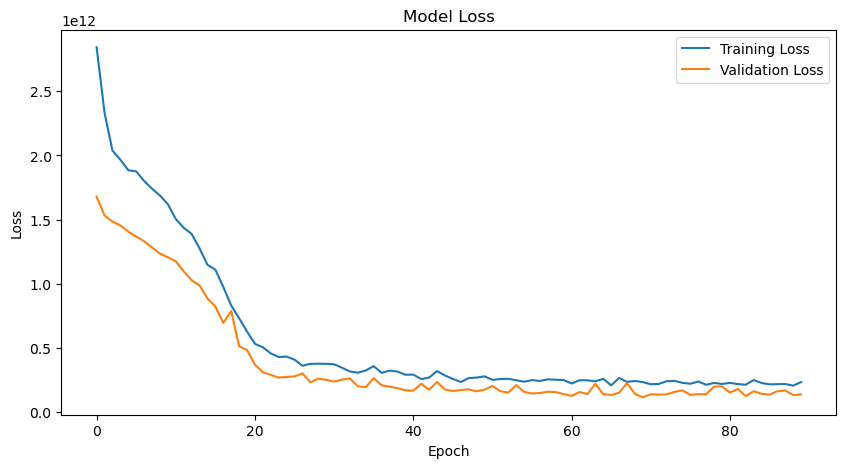

In [169]:
# Plot training & validation loss values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [170]:
print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

Training Loss: 232288256000.0
Validation Loss: 135393132544.0


In [172]:
train = list(y_train)
test = list(y_test)
train_p = list(y_train_predicted)
test_p = list(y_test_predicted)
true_data = train + test
predicted_data = train_p + test_p


predicted_df = pd.DataFrame({'True data': true_data, 'Predicted data': predicted_data})
predicted_df.to_csv('Export_Value_model.csv', index=False)
predicted_df


,True data,Predicted data
0,219605.000000,[434947.8]
1,109.900002,[23.186426]
2,149767.000000,[100918.15]
3,265412.000000,[327780.4]
4,17326.490234,[114.7098]
...,...,...
42083,62324.000000,[6.432608]
42084,0.000000,[6.432608]
42085,0.000000,[6.432608]
42086,120571.000000,[12974.531]


In [174]:
# Flatten the predicted values
train_p_flat = [item[0] for item in train_p]
test_p_flat = [item[0] for item in test_p]

# Combine the true and predicted data
true_data = train + test
predicted_data = train_p_flat + test_p_flat

# Create the DataFrame with appropriate column names
predicted_df = pd.DataFrame({'True data': true_data, 'Predicted data': predicted_data})

# Save to CSV
predicted_df.to_csv('Export_Value_modelprediction.csv', index=False)

# Display the DataFrame
predicted_df


,True data,Predicted data
0,219605.000000,434947.812500
1,109.900002,23.186426
2,149767.000000,100918.148438
3,265412.000000,327780.406250
4,17326.490234,114.709801
...,...,...
42083,62324.000000,6.432608
42084,0.000000,6.432608
42085,0.000000,6.432608
42086,120571.000000,12974.531250
